In [2]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

In [4]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

In [5]:
env = WindyGridworldEnv()

In [6]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
        
        Action_probabilities = np.ones(num_actions, dtype = float) * epsilon / num_actions
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
    
    return policyFunction

In [16]:
def qLearning(env, num_episodes, discount_factor = 1.0, alpha = 0.6, epsilon = 0.1):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(episode_lengths = np.zeros(num_episodes), episode_rewards = np.zeros(num_episodes))
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
    for ith_episode in range(num_episodes):
        state = env.reset()
        for t in itertools.count():
            action_probabilities = policy(state)
            action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities)
            next_state, reward, done, _ = env.step(action)
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            
            if done:
                break
            state = next_state
    return Q, stats

In [17]:
Q, stats = qLearning(env, 1000)

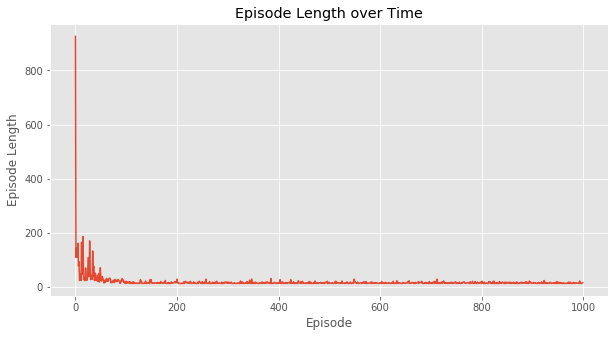

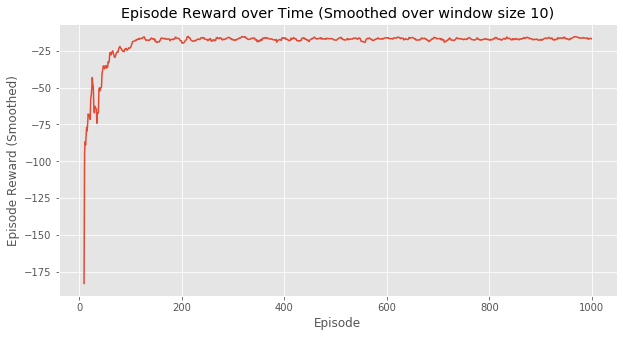

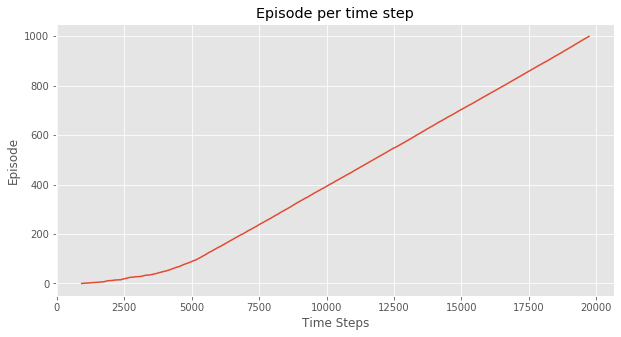

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [18]:
plotting.plot_episode_stats(stats)

In [19]:
import numpy as np
import pylab as pl
import networkx as nx

In [20]:
edges = [(0,1), (1,5), (5,6), (5,4), (1,2), (1,3), (9,10), (2,4), (0,6), (6,7), (8,9), (7,8), (1,7), (3,9)]

C:\Users\Syauqi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


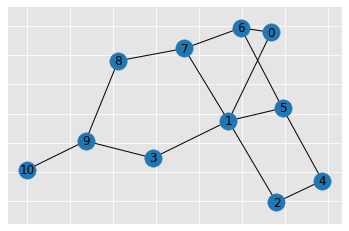

In [21]:
goal =10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
pl.show()

In [22]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= 1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]]=0
        
M[goal, goal]=100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[  1.   0.   1.   1.   1.   1.   0.   1.   1.   1.   1.]
 [  0.   1.   0.   0.   1.   0.   1.   0.   1.   1.   1.]
 [  1.   0.   1.   1.   0.   1.   1.   1.   1.   1.   1.]
 [  1.   0.   1.   1.   1.   1.   1.   1.   1.   0.   1.]
 [  1.   1.   0.   1.   1.   0.   1.   1.   1.   1.   1.]
 [  1.   0.   1.   1.   0.   1.   0.   1.   1.   1.   1.]
 [  0.   1.   1.   1.   1.   0.   1.   0.   1.   1.   1.]
 [  1.   0.   1.   1.   1.   1.   0.   1.   0.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   0.   1.   0.   1.]
 [  1.   1.   1.   0.   1.   1.   1.   1.   0.   1. 100.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   0. 100.]]


In [23]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.75
initial_state =1

In [24]:
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action
available_action = available_actions(initial_state)

In [25]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action
action = sample_next_action(available_action)

In [26]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma *max_value
    if(np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)

In [27]:
update(initial_state, action, gamma)

100.0

In [28]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

Most efficient path: 
[0, 9, 10]


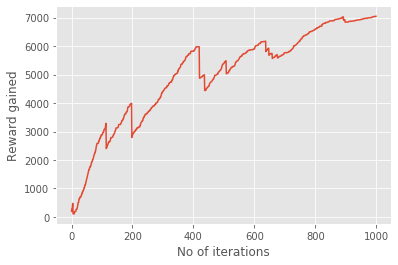

In [31]:
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path: ")
print(steps)
pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

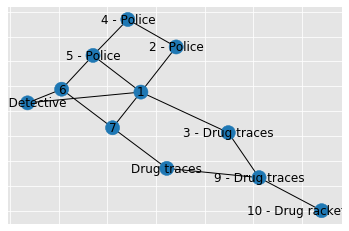

In [33]:
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces', 4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces', 9:'9 - Drug traces', 10:'10 - Drug racket location'}
H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, node_size = [200, 200, 200, 200, 200, 200, 200, 200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

In [34]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [35]:
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action

In [36]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

In [37]:
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)

available_action = available_actions(initial_state)
action = sample_next_action(available_action)

In [38]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q)*100))
    else:
        return (0)
update(initial_state, action, gamma)

100.0

In [39]:
def availabale_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    env_pos_row = env_matrix_snap[state, av_action]
    if(np.sum(anev_pos_row < 0)):
        temp_av_action = av_action[np.array(env_pos_row)[0]>= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
        return av_action

In [40]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

In [41]:
print('Police Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

Police Found
[[ 0.  0.  7.  0.  5.  8.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0. 12.  6.  0.  0.  0.  0.  0.]
 [ 0.  0.  8.  0.  8.  7.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  9.  8.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0. 10.  6.  0.  0.  0.  0.  0.]
 [ 0.  0. 12.  0.  7.  6.  0.  0.  0.  0.  0.]
 [ 0.  0.  9.  0. 12. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  7.  0. 14.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0. 10. 10.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  5.  9.  0.  0.  0.  0.  0.]
 [ 0.  0. 11.  0. 10.  7.  0.  0.  0.  0.  0.]]

Drug traces Found
[[ 0.  0.  0. 10.  0.  0.  0.  0.  7.  9.  0.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  8.  8.  0.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  8.  9.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0. 12.  6.  0.]
 [ 0.  0.  0. 12.  0.  0.  0.  0.  9. 11.  0.]
 [ 0.  0.  0.  8.  0.  0.  0.  0.  9.  7.  0.]
 [ 0.  0.  0.  9.  0.  0.  0.  0.  6. 11.  0.]
 [ 0.  0.  0.  7.  0.  0.  0.  0.  9.  7.  0.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  4. 12.  0.]
 [ 0.  0.  0.  9.  0.  0.  

In [42]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [43]:
env.reset()
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [44]:
state = env.encode(3, 1, 2, 0)
print("State:", state)
env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [45]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}